<h1 style="background-color:#ff5200;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>



[1. Libraries And Utilities](#1)

[2 Preprocessing](#2)

[3 Shapiro Wilk Test For Normality](#3)


[4. Variance Test](#4)

- [4.1 Bartlett's Test](#4.1)
-[4.2 Levene's Test](#4.2)
    
[5.1 Student's t-Test](#5.1)

[5.2 Kruskal Wallis Test](#5.2)

[6. Visualization](#6)


<a id="1"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h1>


In [182]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler
from scipy import stats
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

[Download DATASETS from here](https://drive.google.com/drive/folders/1cBv9fiBQE2PedVPvTu56tOMIOtJTjTj1?usp=sharing)

In [183]:
df0 = pd.read_csv('D:\GitHub\\4BIT\metabolites\dataset\plasma_processed.csv')
df0 = df0.drop('Unnamed: 0', axis=1)
df0.head()

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,9483,103,101,963,389,123,20744,139,36,955,...,27450,52403,73,255067,10057,63,157332,154,1380,disease
1,27468,207,155,335,227,178,8611,78,91,103,...,17898,37179,157,180080,8386,118,103083,324,929,disease
2,13976,86,78,176,152,83,22792,92,97,1010,...,29503,30670,211,138861,15822,119,92045,253,610,disease
3,19449,178,104,467,270,157,29418,123,92,289,...,16501,27573,71,183633,14024,102,97349,223,746,disease
4,17209,258,103,979,314,211,16713,76,42,1126,...,24023,30096,222,255081,23154,58,159671,189,2022,disease


In [184]:
labels = np.reshape(df0.Class.to_numpy(), (82,1))
# labels

<a id="2"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Preprocessing</h1>

In [185]:
#from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler

#scl = StandardScaler().fit(df0.iloc[:, :-1])
#stand = scl.transform(df0.iloc[:, :-1])
# stand
#df = pd.DataFrame(stand, columns = df0.columns[:-1])
#df = pd.concat([df, df0.iloc[:, -1]], axis=1)
#df

In [186]:
#scl.mean_

In [187]:
#len(scl.mean_)

In [188]:
#scl.scale_

In [189]:
temp_df = df0
class_col = temp_df['Class']
temp_df.drop(['Class'] , axis = 1 , inplace = True)

scaler = MinMaxScaler()
scaler.fit(temp_df)
scaled_data = scaler.transform(temp_df) 
scaled_df = pd.DataFrame(scaled_data, columns=temp_df.columns[:])
scaled_df


,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,trans-4-hydroxyproline,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose
0,0.185919,0.002226,0.311377,0.448529,0.269939,0.171329,0.348538,0.021561,0.010719,0.160256,...,0.069866,0.694534,0.761382,0.016830,0.549525,0.182582,0.297619,0.961259,0.025123,0.459721
1,0.572568,0.005398,0.634731,0.118697,0.127958,0.267483,0.084369,0.010223,0.045397,0.004212,...,0.130908,0.392045,0.448459,0.056101,0.370657,0.129623,0.625000,0.438845,0.108867,0.285050
2,0.282511,0.001708,0.173653,0.035189,0.062226,0.101399,0.393129,0.012825,0.049180,0.170330,...,0.125146,0.759548,0.314670,0.081346,0.272336,0.365290,0.630952,0.332550,0.073892,0.161503
3,0.400172,0.004513,0.329341,0.188025,0.165644,0.230769,0.537395,0.018587,0.046028,0.038278,...,0.140812,0.347805,0.251012,0.015895,0.379132,0.308307,0.529762,0.383627,0.059113,0.214175
4,0.352015,0.006953,0.323353,0.456933,0.204207,0.325175,0.260772,0.009851,0.014502,0.191575,...,0.259746,0.586009,0.302871,0.086489,0.549559,0.597661,0.267857,0.983783,0.042365,0.708366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.522713,0.004696,0.628743,0.175945,0.053462,0.382867,0.348190,0.005204,0.068726,0.019414,...,0.155488,0.791690,0.432674,0.035998,0.482083,0.430514,0.261905,0.552835,0.073399,0.256778
78,0.501903,0.003416,0.514970,0.355567,0.127082,0.211538,0.129591,0.007621,0.025221,0.000000,...,0.168452,0.576762,0.229081,0.034128,0.811857,0.783507,0.285714,0.671552,0.126108,0.313710
79,0.494744,0.002684,0.095808,0.012080,0.237511,0.470280,0.116288,0.003532,0.023329,0.144139,...,0.000000,0.784059,0.419375,0.056568,0.723359,0.489335,0.375000,0.198762,0.172414,0.420604
80,0.279759,0.002043,0.095808,0.405462,0.318142,0.169580,0.220623,0.009665,0.116015,0.187546,...,0.651121,0.298056,0.073174,1.000000,0.712291,0.417805,0.565476,0.378629,0.663547,0.329977


<a id="3"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Shapiro Wilk Test for Normality</h1>

In [190]:
class_col

0     disease
1     disease
2     disease
3     disease
4     disease
       ...   
77    control
78    control
79    control
80    control
81    control
Name: Class, Length: 82, dtype: object

In [191]:
df = pd.concat([scaled_df , class_col] , axis = 1)
df

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,0.185919,0.002226,0.311377,0.448529,0.269939,0.171329,0.348538,0.021561,0.010719,0.160256,...,0.694534,0.761382,0.016830,0.549525,0.182582,0.297619,0.961259,0.025123,0.459721,disease
1,0.572568,0.005398,0.634731,0.118697,0.127958,0.267483,0.084369,0.010223,0.045397,0.004212,...,0.392045,0.448459,0.056101,0.370657,0.129623,0.625000,0.438845,0.108867,0.285050,disease
2,0.282511,0.001708,0.173653,0.035189,0.062226,0.101399,0.393129,0.012825,0.049180,0.170330,...,0.759548,0.314670,0.081346,0.272336,0.365290,0.630952,0.332550,0.073892,0.161503,disease
3,0.400172,0.004513,0.329341,0.188025,0.165644,0.230769,0.537395,0.018587,0.046028,0.038278,...,0.347805,0.251012,0.015895,0.379132,0.308307,0.529762,0.383627,0.059113,0.214175,disease
4,0.352015,0.006953,0.323353,0.456933,0.204207,0.325175,0.260772,0.009851,0.014502,0.191575,...,0.586009,0.302871,0.086489,0.549559,0.597661,0.267857,0.983783,0.042365,0.708366,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.522713,0.004696,0.628743,0.175945,0.053462,0.382867,0.348190,0.005204,0.068726,0.019414,...,0.791690,0.432674,0.035998,0.482083,0.430514,0.261905,0.552835,0.073399,0.256778,control
78,0.501903,0.003416,0.514970,0.355567,0.127082,0.211538,0.129591,0.007621,0.025221,0.000000,...,0.576762,0.229081,0.034128,0.811857,0.783507,0.285714,0.671552,0.126108,0.313710,control
79,0.494744,0.002684,0.095808,0.012080,0.237511,0.470280,0.116288,0.003532,0.023329,0.144139,...,0.784059,0.419375,0.056568,0.723359,0.489335,0.375000,0.198762,0.172414,0.420604,control
80,0.279759,0.002043,0.095808,0.405462,0.318142,0.169580,0.220623,0.009665,0.116015,0.187546,...,0.298056,0.073174,1.000000,0.712291,0.417805,0.565476,0.378629,0.663547,0.329977,control


In [192]:
disease = df[(df['Class']=='disease')]
control = df[(df['Class']=='control')]

In [193]:
from scipy import stats
def shapiro_wilk(feature):
    disease_shapiro = stats.shapiro(disease[feature])
    control_shapiro = stats.shapiro(control[feature])
    return feature, disease_shapiro[1], control_shapiro[1] # [1] for p-value, [0] for test statistics

In [194]:
shapiro_wilk_result = []
for i in range(1, 158):
    shapiro_wilk_result.append(shapiro_wilk(df.columns[i]))
shapiro_wilk_result_df = pd.DataFrame(shapiro_wilk_result, columns = ['Features', 'Disease', 'Control'])
shapiro_wilk_result_df = shapiro_wilk_result_df[(shapiro_wilk_result_df.Disease>0.05) & (shapiro_wilk_result_df.Control>0.05)]
normal = shapiro_wilk_result_df.Features.to_numpy()
normal

array(['3-hydroxybutanoic acid', 'alanine', 'asparagine', 'azelaic acid',
       'benzoic acid', 'dodecanol', 'fumaric acid', 'heptadecanoic acid',
       'hydroxycarbamate NIST', 'hydroxylamine', 'indole-3-lactate',
       'lysine', 'p-cresol', 'serine', 'threonine', 'tryptophan',
       'tyrosine', 'urea', 'uric acid'], dtype=object)

So we can see that, only 19 features has p value > 0.05(normally distributed), which declines the proof of 100% normality of our dataset. Now we proceed to <b>Levene Test</b> for testing Equality of Variance. If dataset was 100% normally distributed, we would use <b>Bartlett’s Test</b>.

In [195]:
non_normal = [i for i in df.columns if i not in normal and i!='Class']
len(non_normal)

139

<a id="4"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Variance Test</h1>


<a id="4.1"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:180%;text-align:center;border-radius: 15px 50px;">Bartlett's Test</h1>

In [196]:
def bartlett_test(feature):
    b_test = stats.bartlett(disease[feature], control[feature])
    return feature, b_test[0], b_test[1] # [1] for p-value, [0] for test statistics

In [197]:
bartlett_result = []
for i in normal:
    bartlett_result.append(bartlett_test(i))
bartlett_result_df = pd.DataFrame(bartlett_result, columns = ['Features', 'test', 'p-Value'])
bartlett_result_df

,Features,test,p-Value
0,3-hydroxybutanoic acid,1.955962,0.161946
1,alanine,0.981100,0.321927
2,asparagine,1.573681,0.209673
3,azelaic acid,0.134027,0.714292
4,benzoic acid,2.315345,0.128103
5,dodecanol,1.081147,0.298441
6,fumaric acid,1.855480,0.173147
7,heptadecanoic acid,0.475677,0.490387
8,hydroxycarbamate NIST,0.044703,0.832551
9,hydroxylamine,0.146669,0.701739


In [198]:
parametric = [bartlett_result_df.loc[i, 'Features']\
                    for i in range(len(bartlett_result)) if bartlett_result_df.loc[i, 'p-Value'] > 0.05]
parametric

['3-hydroxybutanoic acid',
 'alanine',
 'asparagine',
 'azelaic acid',
 'benzoic acid',
 'dodecanol',
 'fumaric acid',
 'heptadecanoic acid',
 'hydroxycarbamate NIST',
 'hydroxylamine',
 'indole-3-lactate',
 'lysine',
 'p-cresol',
 'serine',
 'threonine',
 'tryptophan',
 'tyrosine',
 'urea',
 'uric acid']

<a id="4.2"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:180%;text-align:center;border-radius: 15px 50px;">Levene's Test</h1>

In [199]:
def levene_test(feature):
    l_test = stats.levene(disease[feature], control[feature])
    return feature, l_test[0], l_test[1] # [1] for p-value, [0] for test statistics

In [200]:
levene_result = []
for i in non_normal:
    levene_result.append(levene_test(i))
levene_result_df = pd.DataFrame(levene_result, columns = ['Features', 'test', 'p-Value'])
levene_result_df

,Features,test,p-Value
0,1_5-anhydroglucitol,0.923284,0.339509
1,1-monostearin,2.614252,0.109844
2,2_3-dihydroxybutanoic acid NIST,0.006478,0.936050
3,2_4-diaminobutyric acid,0.096940,0.756343
4,2-deoxyerythritol,0.908407,0.343408
...,...,...,...
134,UDP-glucuronic acid,1.681392,0.198467
135,uridine,0.032911,0.856501
136,valine,0.354581,0.553212
137,xylitol,0.312940,0.577445


In [201]:
parametric += [levene_result_df.loc[i, 'Features']\
                    for i in range(len(levene_result)) if levene_result_df.loc[i, 'p-Value'] > 0.05]
len(parametric)

138

In [202]:
non_parametric = [i for i in df.columns if i not in parametric and i!='Class']
len(non_parametric)

20

So, we got:
- Parametric features: 138 which needs Student's t-Test
- NonParametric: 20 which needs Kruskal Wallis t-Test

<a id="5.1"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Student's t-Test</h1>

In [203]:
t_result = []
for i in parametric:
    t_test = stats.ttest_ind(disease[i], control[i])
    t_result.append([i, t_test[0], t_test[1]])
t_result_df = pd.DataFrame(t_result, columns = ['Features', 'test', 'p-Value'])
t_result_df

,Features,test,p-Value
0,3-hydroxybutanoic acid,-2.028900,0.045795
1,alanine,-0.894646,0.373660
2,asparagine,-3.494524,0.000777
3,azelaic acid,1.144937,0.255649
4,benzoic acid,-3.272815,0.001574
...,...,...,...
133,UDP-glucuronic acid,-1.183851,0.239978
134,uridine,-0.013382,0.989356
135,valine,-0.845800,0.400187
136,xylitol,-0.609977,0.543606


<a id="5.2"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Kruskal Wallis Test</h1>


In [204]:
k_result = []
for i in non_parametric:
    k_test= stats.kruskal(disease[i], control[i])
    k_result.append([i, k_test[0], k_test[1]])
k_result_df = pd.DataFrame(k_result, columns = ['Features', 'test', 'p-Value'])
k_result_df

,Features,test,p-Value
0,3-phosphoglycerate,21.123897,4.305257e-06
1,5-methoxytryptamine,21.379296,3.768184e-06
2,adenosine-5-monophosphate,37.014868,1.172319e-09
3,aspartic acid,19.652367,9.288817e-06
4,beta-alanine,1.579168,2.088806e-01
5,citric acid,1.922285,1.656050e-01
6,conduritol-beta-epoxide,0.072346,7.879518e-01
7,indoxyl sulfate,1.376850,2.406384e-01
8,isocitric acid,0.045502,8.310830e-01
9,lactic acid,17.923260,2.299930e-05


In [205]:
result_df = pd.concat([t_result_df, k_result_df], axis=0, ignore_index=True)
result_df

,Features,test,p-Value
0,3-hydroxybutanoic acid,-2.028900,4.579484e-02
1,alanine,-0.894646,3.736602e-01
2,asparagine,-3.494524,7.772173e-04
3,azelaic acid,1.144937,2.556490e-01
4,benzoic acid,-3.272815,1.573528e-03
...,...,...,...
153,pyrophosphate,28.288926,1.044920e-07
154,pyruvic acid,13.182536,2.825701e-04
155,shikimic acid,0.166521,6.832223e-01
156,taurine,24.617982,6.989644e-07


In [206]:
metabolics = result_df[(result_df['p-Value'] < 0.015)].loc[:, 'Features']
metabolics = metabolics.to_numpy()
len(metabolics)
# metabolics

26

In [207]:
metabolites = result_df[(result_df['p-Value'] < 0.015)]
latex_metabolites = metabolites.loc[:, ['Features', 'p-Value']]
latex_metabolites.to_latex('output.tex')

In [208]:
r_metabolites = result_df[(result_df['p-Value'] >= 0.015)]
latex_metabolites = r_metabolites.loc[:, ['Features', 'p-Value']]
latex_metabolites.to_latex('output_removed.tex')
latex_metabolites.to_csv('output_removed.csv', index=False)

In [209]:
latex_metabolites

,Features,p-Value
0,3-hydroxybutanoic acid,0.045795
1,alanine,0.373660
3,azelaic acid,0.255649
5,dodecanol,0.308227
6,fumaric acid,0.446523
...,...,...
144,conduritol-beta-epoxide,0.787952
145,indoxyl sulfate,0.240638
146,isocitric acid,0.831083
155,shikimic acid,0.683222


Now we keep the data of these metabolics only, from main dataset.

In [210]:
final_df = df.loc[:, metabolics]
final_df = pd.concat([final_df, df.loc[:, 'Class']], axis=1)
final_df.to_csv('plasma(Specific Metabolics)_final2.csv')
final_df

,asparagine,benzoic acid,tryptophan,uric acid,5-hydroxynorvaline NIST,alpha-ketoglutarate,citrulline,glutamine,hypoxanthine,malic acid,...,lactic acid,maltose,maltotriose,N-methylalanine,phenol,phosphoethanolamine,pyrophosphate,pyruvic acid,taurine,Class
0,0.360563,0.126173,0.694534,0.182582,0.039657,0.266735,0.193740,0.299364,0.253521,0.4175,...,0.192062,0.035693,0.003610,0.235737,0.307607,0.129204,0.208521,0.648101,0.384957,disease
1,0.647887,0.301356,0.392045,0.129623,0.045016,0.131823,0.359957,0.584603,0.402973,0.3100,...,0.230294,0.042715,0.158845,0.051356,0.368129,0.012389,0.177087,0.370040,0.246906,disease
2,0.592958,0.296142,0.759548,0.365290,0.123258,0.243048,0.154884,0.425449,0.140845,0.3050,...,0.406781,0.127560,0.274368,0.132132,0.515269,0.127434,0.499480,0.246329,0.485112,disease
3,0.519014,0.747132,0.347805,0.308307,0.057878,0.078270,0.084188,0.609313,0.487480,0.2275,...,0.302490,0.059099,0.122744,0.561007,0.458356,0.099115,0.132490,0.125774,0.585654,disease
4,0.507746,0.148592,0.586009,0.597661,0.347267,0.168898,0.372909,0.272807,0.226917,0.4175,...,0.137315,0.088356,0.382671,0.405620,0.274292,0.168142,0.397471,0.271569,0.303171,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.609859,0.266945,0.791690,0.430514,0.133976,0.146241,0.260119,0.588824,0.086072,0.1375,...,0.060233,0.033353,0.122744,0.379049,0.196557,0.063717,0.045982,0.265744,0.194702,control
78,0.351408,0.177789,0.576762,0.783507,0.148982,0.094748,0.180248,0.312277,1.000000,0.1850,...,0.325375,0.059684,0.090253,0.337684,0.478345,0.067257,0.220904,0.163815,0.228538,control
79,0.421127,0.708551,0.784059,0.489335,0.168274,0.306900,0.397194,0.681691,0.084507,0.4925,...,0.097008,0.033938,0.184116,0.092637,0.241532,0.092035,0.114912,0.203980,0.153519,control
80,0.180282,0.583942,0.298056,0.417805,0.049303,0.169928,0.055586,0.023422,0.119718,0.2800,...,0.111160,0.009947,0.057762,0.369314,0.292060,0.065487,0.055161,0.269142,0.030356,control


<a id="6"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Visualization</h1>

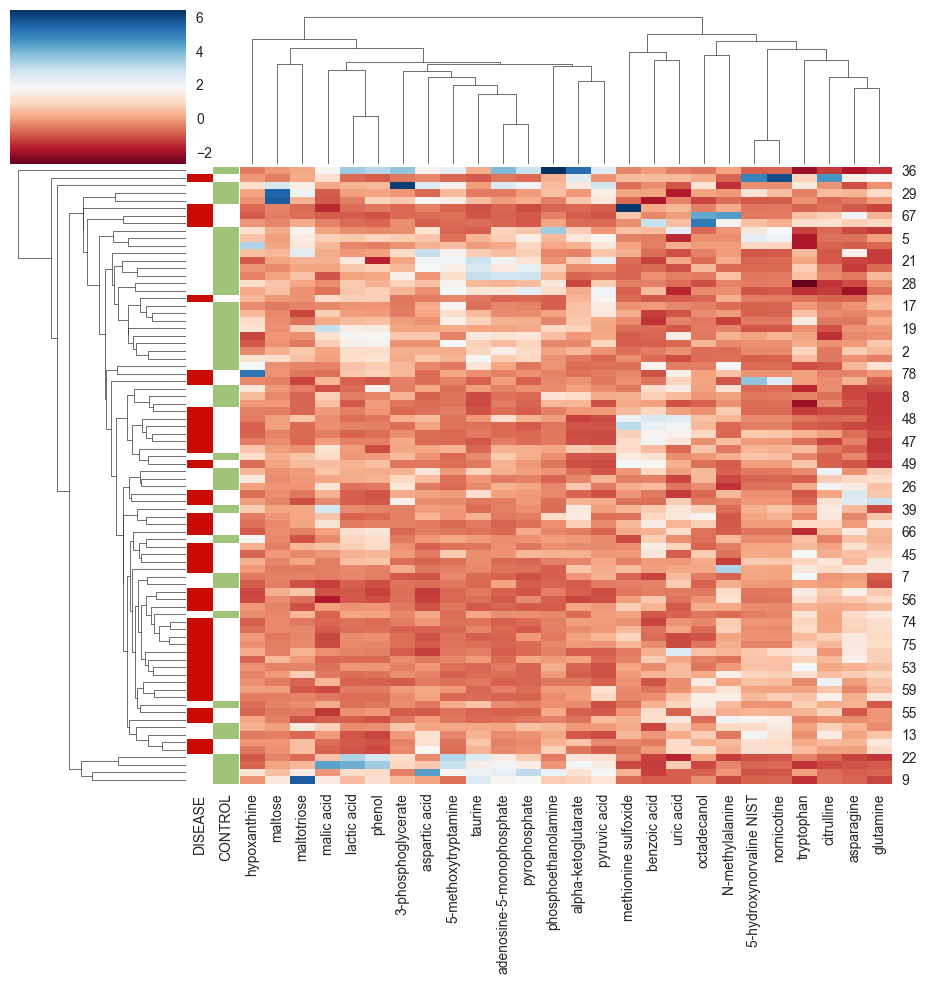

In [211]:
# Data set
import seaborn as sns
final_df1 = final_df.copy()
Class = final_df.pop("Class")
# final_df = final_df.set_index('Metabolics')

lut = dict(zip(Class.unique(), "grb"))
row_colors = Class.map(lut)
df_colors = pd.DataFrame(data={'DISEASE': row_colors[row_colors == 'r'], 'CONTROL': row_colors[row_colors == 'g']}) 
# Default plot
g = sns.clustermap(final_df, cmap='RdBu', row_colors=df_colors, z_score=1)      #z_score->standardize; standard_cale->normalize
g.fig.subplots_adjust(right=0.9)
g.ax_cbar.set_position((0.7, .2, .03, .4), 'horizontal')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
# Show the graph
plt.savefig('clustermap_plasma.JPG')
plt.show()

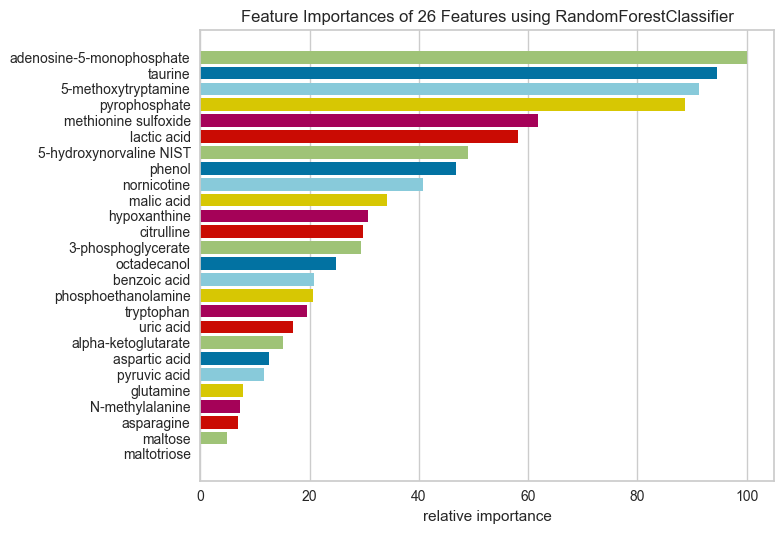

<Axes: title={'center': 'Feature Importances of 26 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [212]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
X = final_df1.drop('Class', axis=1)
y = final_df1['Class'].copy()
y = y.map({"control": 1, "disease": 0})

model = RandomForestClassifier(n_estimators=29)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

In [213]:
# Ridge classsifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [214]:
alpha = 1.0 # Regularization strength ( adjustable )
max_iter = 1000 # Maximum number of iterations for the solution to converge
solver = 'auto' # Solver for optimization
tol = 1e-3 # Tolerance for stopping criterion

In [215]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [216]:
X_test

,asparagine,benzoic acid,tryptophan,uric acid,5-hydroxynorvaline NIST,alpha-ketoglutarate,citrulline,glutamine,hypoxanthine,malic acid,...,aspartic acid,lactic acid,maltose,maltotriose,N-methylalanine,phenol,phosphoethanolamine,pyrophosphate,pyruvic acid,taurine
30,0.000000,0.482273,0.259864,0.035876,0.012862,0.213182,0.028063,0.199247,0.200313,0.1900,...,0.192800,0.312598,0.170275,0.140794,0.214267,0.468906,0.260177,0.832092,0.841463,0.589714
0,0.360563,0.126173,0.694534,0.182582,0.039657,0.266735,0.193740,0.299364,0.253521,0.4175,...,0.237950,0.192062,0.035693,0.003610,0.235737,0.307607,0.129204,0.208521,0.648101,0.384957
22,0.171831,0.133994,0.491513,0.033975,0.000000,0.382080,0.105235,0.017111,0.030516,0.3800,...,0.181208,0.839582,0.028087,0.068592,0.031587,0.846197,0.051327,0.436786,0.574870,0.885344
31,0.242958,0.302398,0.183356,0.467214,0.333333,0.231720,0.105235,0.165780,0.701095,0.3475,...,0.281879,0.126652,0.093622,0.364621,0.233441,0.240422,0.136283,0.494718,0.643611,0.257927
18,0.317606,0.092805,0.894737,0.322568,0.085745,0.286303,0.153805,0.394920,0.344288,0.3175,...,0.197682,0.280345,0.044470,0.086643,0.036604,0.419767,0.070796,0.318410,0.330603,0.483179
28,0.196479,0.299791,0.000000,0.253478,0.092176,0.008239,0.005936,0.294264,0.347418,0.2525,...,0.327029,0.328163,0.179637,0.191336,0.179832,0.378123,0.304425,0.382231,0.461230,0.377997
10,0.390141,0.589155,0.517512,0.403290,0.090032,0.085479,0.597410,0.522353,0.241784,0.3875,...,0.455766,0.228690,0.050322,0.166065,0.109600,0.354803,0.104425,0.267059,0.033006,0.490913
53,0.489437,0.335245,0.993825,0.517542,0.270096,0.069001,0.261738,0.458067,0.156495,0.1925,...,0.204393,0.165879,0.014628,0.119134,0.233484,0.297057,0.152212,0.084084,0.012316,0.085073
4,0.507746,0.148592,0.586009,0.597661,0.347267,0.168898,0.372909,0.272807,0.226917,0.4175,...,0.236120,0.137315,0.088356,0.382671,0.405620,0.274292,0.168142,0.397471,0.271569,0.303171
12,0.557746,0.556830,0.690101,0.367921,0.131833,0.169928,0.173772,0.400816,0.471831,0.2375,...,0.205613,0.366780,0.035108,0.021661,0.311241,0.525819,0.116814,0.215535,0.209259,0.260441


In [217]:
X_test.shape

(17, 26)

In [218]:
X_test_list = X_test.columns.to_list()
X_test_list

['asparagine',
 'benzoic acid',
 'tryptophan',
 'uric acid',
 '5-hydroxynorvaline NIST',
 'alpha-ketoglutarate',
 'citrulline',
 'glutamine',
 'hypoxanthine',
 'malic acid',
 'methionine sulfoxide',
 'nornicotine',
 'octadecanol',
 '3-phosphoglycerate',
 '5-methoxytryptamine',
 'adenosine-5-monophosphate',
 'aspartic acid',
 'lactic acid',
 'maltose',
 'maltotriose',
 'N-methylalanine',
 'phenol',
 'phosphoethanolamine',
 'pyrophosphate',
 'pyruvic acid',
 'taurine']

In [219]:
# training the model
ridge_classifier_model = RidgeClassifier(
	alpha=alpha, max_iter=max_iter, solver=solver, tol=tol)
ridge_classifier_model.fit(X_train, y_train)


RidgeClassifier(max_iter=1000, tol=0.001)

d:\GitHub\4BIT\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeClassifier was fitted with feature names
  warnings.warn(
d:\GitHub\4BIT\myenv\Lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


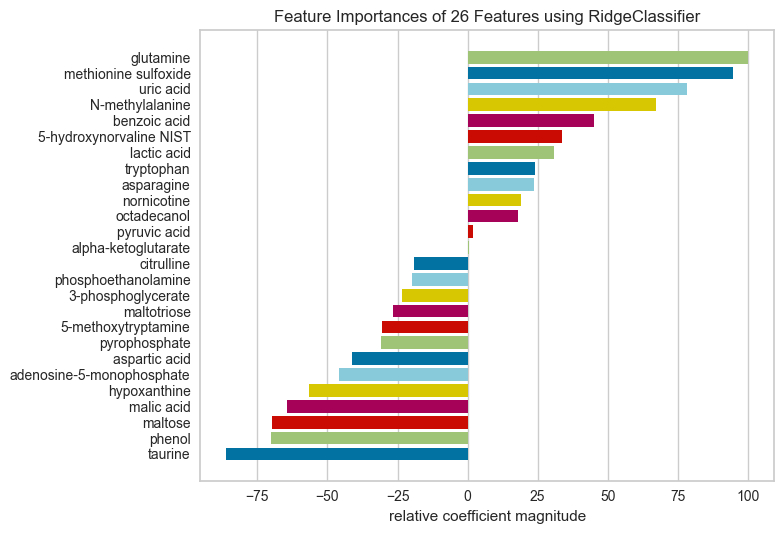

<Axes: title={'center': 'Feature Importances of 26 Features using RidgeClassifier'}, xlabel='relative coefficient magnitude'>

In [220]:
viz2 = FeatureImportances(ridge_classifier_model)
viz2.fit(X,y)
viz2.show()

In [221]:
y_pred = ridge_classifier_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [222]:
import pickle
with open('D:\GitHub\\4BIT\metabolites\\models\\plasma_ridge_model.pkl' , 'wb' ) as file : 
    pickle.dump(model, file)

In [223]:
# Step 5: Calculate the accuracy score to evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8823529411764706


In [224]:
#Generate report
print(classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)


              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.75      1.00      0.86         6

    accuracy                           0.88        17
   macro avg       0.88      0.91      0.88        17
weighted avg       0.91      0.88      0.88        17



Classification report saved as 'classification_report.png'


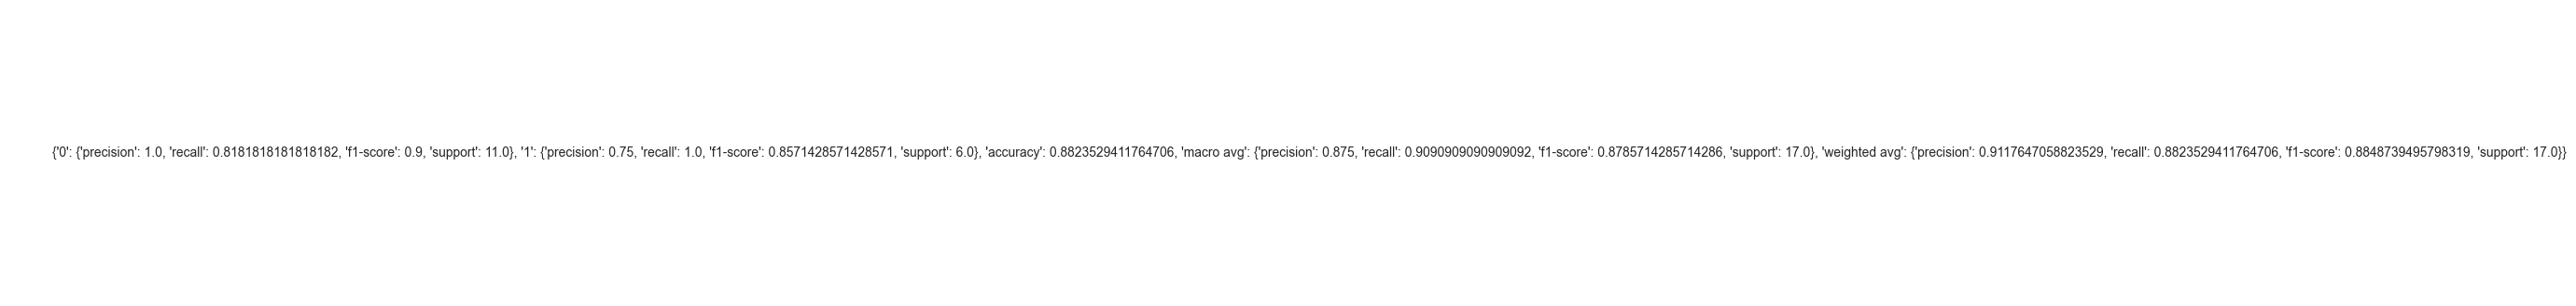

In [225]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')  # Hide axes

# Add the classification report as text
ax.text(0.1, 0.5, report, fontsize=10, va='center')

# Save the figure as a PNG
plt.savefig('classification_report.png', dpi=300, bbox_inches='tight')

print("Classification report saved as 'classification_report.png'")